# Project 1 (Module 6) -- Regression for Numeric Data 
### Group Members: Gege Li, Zhihong Zhang, Zhijing Zhang

## Introduction

In this project, we are going to use the wine data set to construct and compare a series of regression models. The response variable we will be modeling is the data set’s “TARGET” attribute. 
As we recall from the previous M3 assignment, we need to deal with this data set at first. So first of all we will do the EDA and data preparation part. Then we plan to use our knowledge of feature selection and then construct the different types of regression models.
Finally, we will evaluate the mode through model performance metrics to find our 'best' regression model. 

## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# check and read the original dataset from github
eval_data = pd.read_csv("https://raw.githubusercontent.com/gegeli638/DAV-6150/master/Project1_Eval.csv")

eval_data.head()

,IN,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,NaN,5.4,-0.860,0.27,-10.7,0.092,23.0,398.0,0.98527,5.02,0.64,12.30,-1,6,NaN
1,9,NaN,12.4,0.385,-0.76,-19.7,1.169,-37.0,68.0,0.99048,3.37,1.09,16.00,0,6,2.0
2,10,NaN,7.2,1.750,0.17,-33.0,0.065,9.0,76.0,1.04641,4.61,0.68,8.55,0,8,1.0
3,18,NaN,6.2,0.100,1.80,1.0,-0.179,104.0,89.0,0.98877,3.20,2.11,12.30,-1,8,1.0
4,21,NaN,11.4,0.210,0.28,1.2,0.038,70.0,53.0,1.02899,2.54,-0.07,4.80,0,10,NaN


In [ ]:
# check and read the dataset from github
#df = pd.read_csv("https://raw.githubusercontent.com/zhijing-zhang/DAV6150/master/Dataset/M3_Data.csv")
df = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/M3_Data.csv')

df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


Before we start data analysis, summaries, and explanations of these attributes were given.
The whole dataset contained 12000 rows and 16 attributes. Due to the complexity of this data set, by reading from the file, these attributes are as follows:

- INDEX: 
Unique ID
- TARGET: 
Response Variable (indicates # of cases of wine sold)
- STARS: Wine rating as determined by experts (4 = excellent; 1 = Poor)

- LabelAppeal: Subjective marketing score that indicates the appeal of the design of the label on the bottle

- AcidIndex：
Measures total acidity of wine via a weighted average

- fixed acidity	: amount of fixed acid
-	volatile acidity: amount of volatile acid
- citric acid : amount of citric acid
- alcohol	: amount of alcohol
- residual sugar: amount of residual sugar
- chlorides : amount of chlorides
- free sulfur dioxide: amount of SO2 that is not bound to other molecules.
- total sulfur dioxide:  amount of total sulfur dioxide
- density: amount of whether the post is clicked or not.

- pH: The number of level of acidity

- sulphates	: amount of sulphates
- quality: quality of the red wine. 

In [ ]:
df.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

In [ ]:
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [ ]:
#describe the dataset
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
INDEX,12795.0,8069.980305,4656.905107,1.00000,4037.50000,8110.00000,12106.500000,16129.00000
TARGET,12795.0,3.029074,1.926368,0.00000,2.00000,3.00000,4.000000,8.00000
FixedAcidity,12795.0,7.075717,6.317643,-18.10000,5.20000,6.90000,9.500000,34.40000
VolatileAcidity,12795.0,0.324104,0.784014,-2.79000,0.13000,0.28000,0.640000,3.68000
CitricAcid,12795.0,0.308413,0.862080,-3.24000,0.03000,0.31000,0.580000,3.86000
ResidualSugar,12179.0,5.418733,33.749379,-127.80000,-2.00000,3.90000,15.900000,141.15000
Chlorides,12157.0,0.054822,0.318467,-1.17100,-0.03100,0.04600,0.153000,1.35100
FreeSulfurDioxide,12148.0,30.845571,148.714558,-555.00000,0.00000,30.00000,70.000000,623.00000
TotalSulfurDioxide,12113.0,120.714233,231.913211,-823.00000,27.00000,123.00000,208.000000,1057.00000
Density,12795.0,0.994203,0.026538,0.88809,0.98772,0.99449,1.000515,1.09924


Based on checking of these attributes, many of attributes seem to have measure error. Since the amount should not be negative for many terms which includes FixedAcidity VolatileAcidity CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Sulphates, Alcohol and LabelAppeal. These negative data should be dealt in Data Preparation.

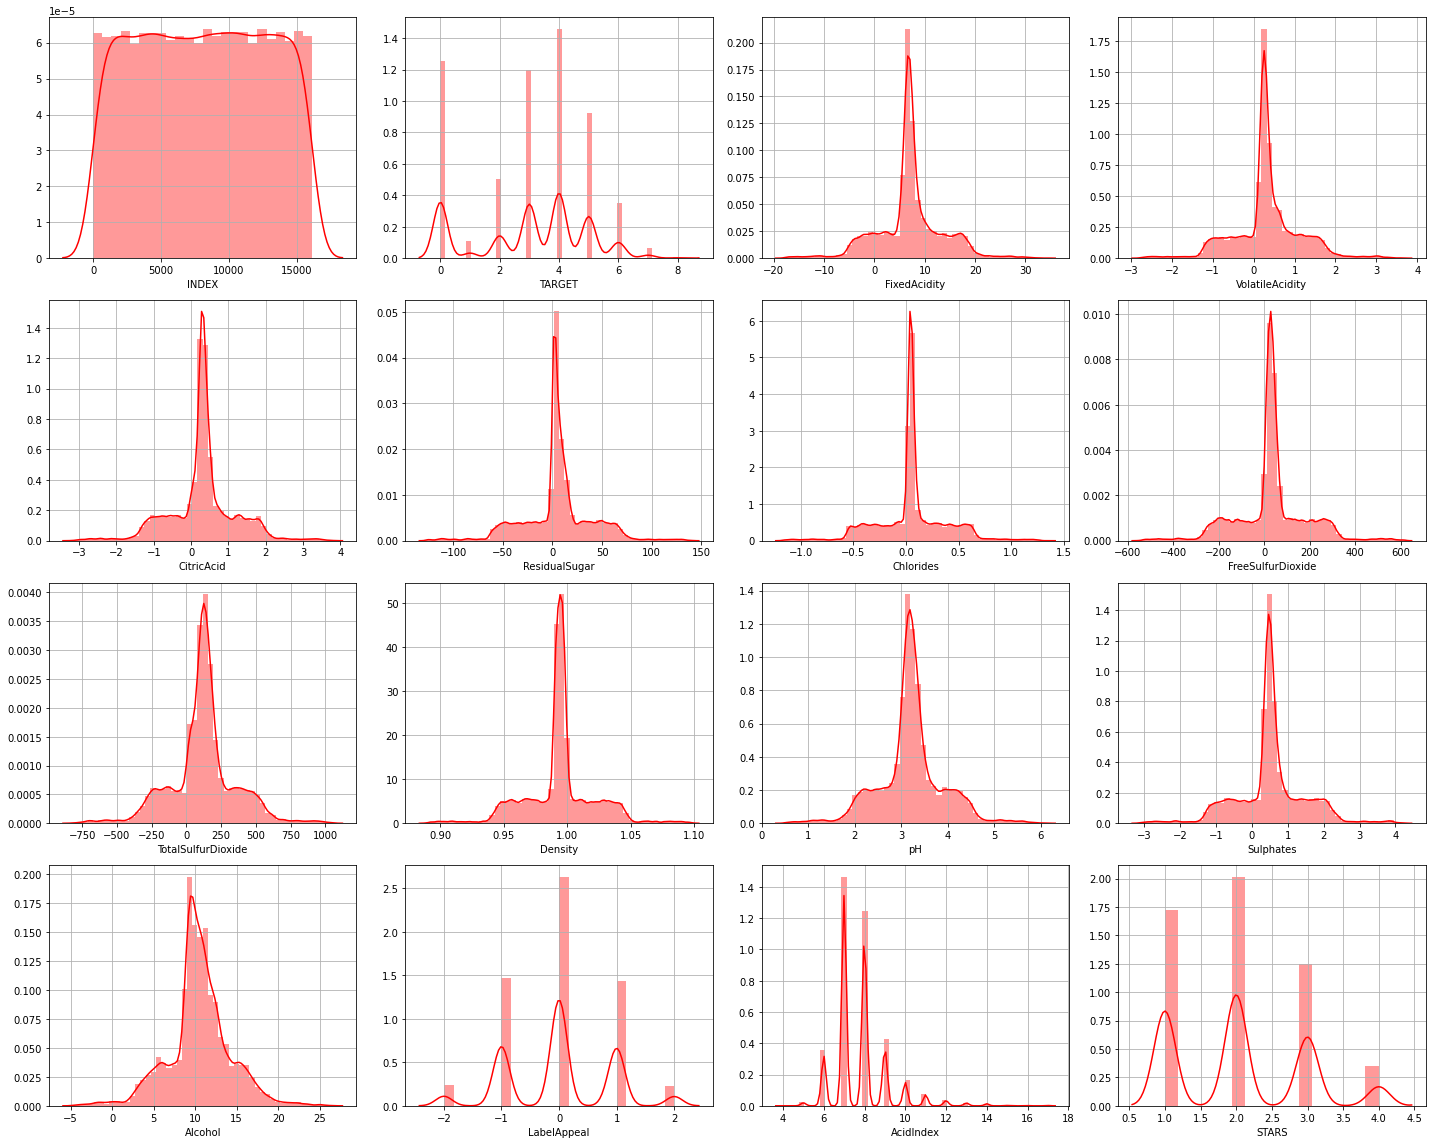

In [ ]:
#distribution histogram of all variables
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4, 4, i + 1)
    sns.distplot(df[col], color = 'r', kde = True)
    plt.grid()
    plt.tight_layout()

Since we already know certain attributes have missing values. We need to mainly focus on Chloride, FreeSulfurDioxide , TotalSulfurDioxide, pH, Sulphates, Alcohol , and STARS. We can tell that Sulphates is mainly a uniform distribution and it does not provide much useful information. Even it has some missing data, we can even try not to use these attributes. All other six attributes have a quite normal shape and we want to check carefully. We used boxplot to detect the outlier.

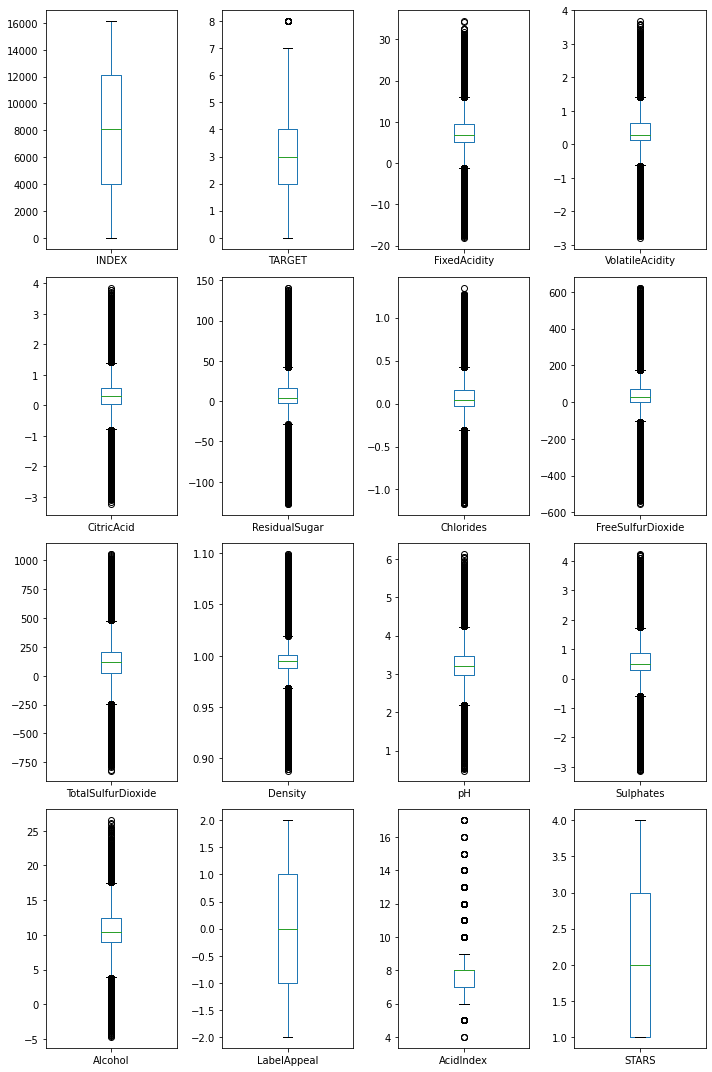

In [ ]:
#boxplot of all variables
plt.figure(figsize = (10, 15))
for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4, 4, i + 1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

Based on these boxplots, it is clear to see many of them have many outliers.

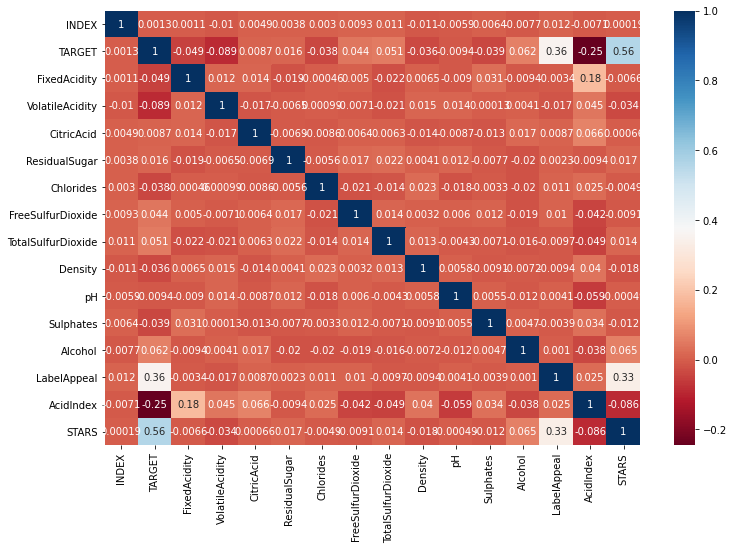

In [ ]:
#correlation heatmap 
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.show()

For this heat map, as we knew index is just the unique ID, we can technically ignore all parts related to these attributes. Read from whole maps, it is remarkable to see that TARGET and STARS have some strong positive correlation. Also, there are some correlations among TARGET, LabelAppeal, and STARS. There is some weak correlation between AcidIndex and Fixed Acidity. In general, except for these attributes, there is no evidence that there are some obvious correlations among these data.

## Data Preparation

In [ ]:
# delete index 
wine = df.copy().drop(columns = ['INDEX'])

__Dealing with the unreasonable values__


In [ ]:
wine = wine.abs()
wine.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0.0,8.0,2.0
1,3.0,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,1.0,7.0,3.0
2,5.0,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,1.0,6.0,1.0
4,4.0,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0.0,9.0,2.0


For these negative data in the attributes, we can either use the absolute function to take out negatives or just take out whole data. Based on our analysis, we decide to use absolute value to deal with some negative data value. Based on the research of these attributes and the boxplot of the attribute, we think using absolute value is reasonable for these three reasons:
- some negative values are negligibly small ( such as chloride amount ).

- Almost all negative values were treated as a negative outlier on the boxplots, and it has almost identical symmetric positive outliers on the other side. 

- even using absolute value, the absolute value of each min value is still lower than the maximum value of attributes. It means that applying absolute value will not create some positive maximum values.

__Fill the missing value__

For the few missing value, we used median directly since it will not change much on the PDF. But for the attributes have 20% missing value, such as STARS, we plan to use interpolation  due to some research of the relationship on the linearity. 

In [ ]:
# ResidualSugar- median
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.ResidualSugar.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.ResidualSugar = predictors_imputed

Similarly, we use median for other attributes except STARS

In [ ]:
# Chloride- median

imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.Chlorides.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.Chlorides  = predictors_imputed

In [ ]:
# FreeSulfurDioxide - median

imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.FreeSulfurDioxide.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.FreeSulfurDioxide  = predictors_imputed

In [ ]:
# TotalSulfurDioxide  - median

imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.TotalSulfurDioxide.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.TotalSulfurDioxide = predictors_imputed

In [ ]:
# PH  - median

imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.pH.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.pH = predictors_imputed

In [ ]:
# Sulphates  - median

imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.Sulphates.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.Sulphates = predictors_imputed

In [ ]:
# Alcohol   - median

imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.Alcohol.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.Alcohol  = predictors_imputed

In [ ]:
wine.describe().T 

,count,mean,std,min,25%,50%,75%,max
TARGET,12795.0,3.029074,1.926368,0.00000,2.00000,3.00000,4.000000,8.00000
FixedAcidity,12795.0,8.063251,4.996119,0.00000,5.60000,7.00000,9.800000,34.40000
VolatileAcidity,12795.0,0.641086,0.555614,0.00000,0.25000,0.41000,0.910000,3.68000
CitricAcid,12795.0,0.686315,0.606005,0.00000,0.28000,0.44000,0.970000,3.86000
ResidualSugar,12795.0,22.863849,24.440673,0.00000,4.00000,12.90000,37.200000,141.15000
Chlorides,12795.0,0.216348,0.229975,0.00000,0.04600,0.09800,0.353000,1.35100
FreeSulfurDioxide,12795.0,104.116374,105.917566,0.00000,29.00000,56.00000,164.000000,623.00000
TotalSulfurDioxide,12795.0,201.637007,159.111814,0.00000,102.00000,154.00000,251.000000,1057.00000
Density,12795.0,0.994203,0.026538,0.88809,0.98772,0.99449,1.000515,1.09924
pH,12795.0,3.207393,0.669114,0.48000,2.97000,3.20000,3.450000,6.13000


Based on the correlation matrix, we knew that the STAR has some correlation with TARGET.But since the correlation is not strong enough, linearity is not good enough for interpolation to fill missing value. We decided to use KNN to fill the data. On determining the data, one suggestion is to use square root of n, we choose 5 as smallest number due to odd number and the data size of 16.

In [ ]:
#using knn 
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_complete=pd.DataFrame(imputer.fit_transform(wine.iloc[:,:16]),columns=wine.columns.tolist()[:16])

#print out 
df_complete.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,0.98,54.2,0.567,56.0,268.0,0.99280,3.33,0.59,9.9,0.0,8.0,2.0
1,3.0,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,10.4,1.0,7.0,3.0
2,5.0,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,1.0,6.0,1.0
4,4.0,8.0,0.330,1.26,9.4,0.098,167.0,108.0,0.99457,3.12,1.77,13.7,0.0,9.0,2.0


After KNN filling the value of Star, we can also check the distribution of STARS.

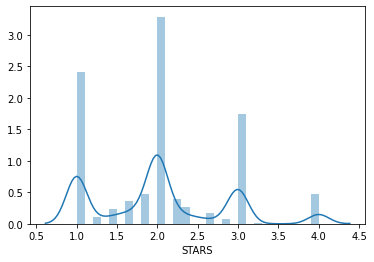

In [ ]:
# create a graphic showing the distribution of the non-null 

sns.distplot(df_complete[df_complete["STARS"].notnull()].STARS)

We can tell the KNN mainly fill the value around quality rating of two.

In [ ]:
#check
df_complete.isnull().sum()

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6557697710>,
      dtype=object)

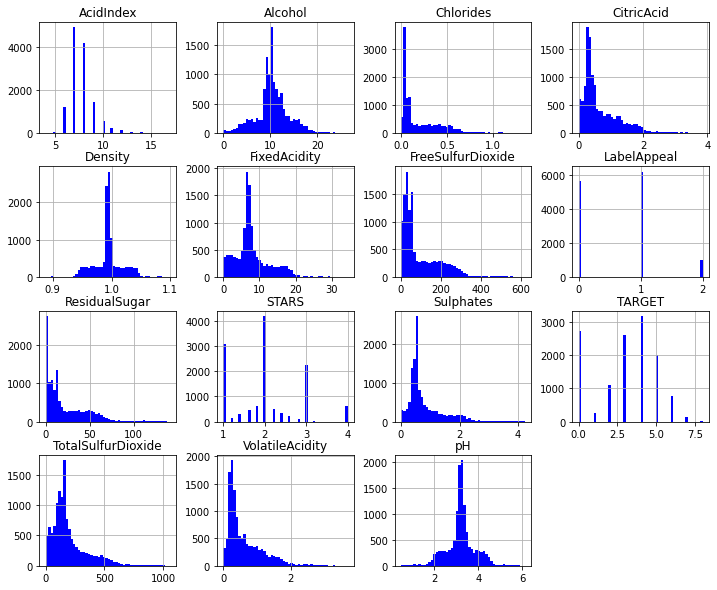

In [ ]:
#rerun to have overview of all histogram
df_complete.hist(bins=50, color='b', figsize=(12,10))

After dealing with negative and missing values, we also need to check these outliers.

__Treat the outliers__

We start with identify the IQR. The IQR describes the middle 50% of values from data set when ordered from lowest to highest.

In [ ]:
#define outlier
#first get IQR
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
IQR.describe()

count     15.000000
mean      22.213320
std       49.400373
min        0.012795
25%        0.605000
50%        1.000000
75%        3.650000
max      149.000000
dtype: float64

Firstly call a data tidy only covers the value in IQR. 

In [ ]:
#run to remove outlier. 
tidy = wine[~((wine < (Q1 - 1.5 * IQR)) |(wine > (Q3 + 1.5 * IQR))).any(axis=1)]
tidy.shape

(3966, 15)

In [ ]:
tidy.describe() 

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3034.000000
mean,3.221886,6.849256,0.578129,0.610613,21.077068,0.193420,94.923853,169.422970,0.994007,3.204892,0.653938,10.581091,0.651034,7.490671,2.064272
std,1.862536,3.473050,0.448462,0.479890,20.835635,0.189702,86.461893,103.907495,0.009021,0.388250,0.381439,2.504272,0.624637,0.839617,0.915570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.968580,2.250000,0.000000,4.500000,0.000000,6.000000,1.000000
25%,2.000000,5.200000,0.240000,0.280000,4.100000,0.045000,30.000000,102.000000,0.990960,3.040000,0.420000,9.300000,0.000000,7.000000,1.000000
50%,4.000000,6.750000,0.380000,0.410000,12.900000,0.098000,56.000000,152.000000,0.994020,3.200000,0.570000,10.400000,1.000000,7.000000,2.000000
75%,5.000000,8.000000,0.860000,0.890000,34.775000,0.332000,151.000000,212.000000,0.997300,3.380000,0.770000,12.000000,1.000000,8.000000,3.000000
max,7.000000,16.100000,1.900000,2.000000,86.850000,0.811000,366.000000,474.000000,1.019640,4.170000,1.820000,16.800000,2.000000,9.000000,4.000000


After clearing outlier, then we check these data, we knew there is an obvious problem here, clearing these outlier all together is not a practical method for this data set. We can not clear more than 70% of whole data set. So we need to try other methods. We did each individual outlier check firstly.

We tried such as PH, Sulphate, or STARS as our representatives.

In [ ]:
#individual outlier for pH
pH_outliers =wine[np.abs(df['pH'] - wine['pH'].mean() ) > (2.5 * wine['pH'].std())]
pH_outliers.shape

(342, 15)

In [ ]:
#individual outlier for Sulphates
Sulphates_outliers =wine[np.abs(wine['Sulphates'] - wine['Sulphates'].mean() ) > (2.5 * wine['Sulphates'].std())]
Sulphates_outliers.shape

(329, 15)

In [ ]:
#individual outlier for STAR
STAR_outliers =wine[np.abs(wine['Sulphates'] - wine['Sulphates'].mean() ) > (2.5 * wine['Sulphates'].std())]
STAR_outliers.shape

(329, 15)

When we compare outliers with each individual attribute from whole data set, we can find they are relatively small, and they are not too extreme, we think it will not change too much on our models.

## Prepped Data Review
Re-run EDA and we find:

In [ ]:
#now let wine be filled data
wine=df_complete

In [ ]:
wine.isnull().sum()

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

In [ ]:
#describe the dataset
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,12795.0,3.029074,1.926368,0.00000,2.00000,3.00000,4.000000,8.00000
FixedAcidity,12795.0,8.063251,4.996119,0.00000,5.60000,7.00000,9.800000,34.40000
VolatileAcidity,12795.0,0.641086,0.555614,0.00000,0.25000,0.41000,0.910000,3.68000
CitricAcid,12795.0,0.686315,0.606005,0.00000,0.28000,0.44000,0.970000,3.86000
ResidualSugar,12795.0,22.863849,24.440673,0.00000,4.00000,12.90000,37.200000,141.15000
Chlorides,12795.0,0.216348,0.229975,0.00000,0.04600,0.09800,0.353000,1.35100
FreeSulfurDioxide,12795.0,104.116374,105.917566,0.00000,29.00000,56.00000,164.000000,623.00000
TotalSulfurDioxide,12795.0,201.637007,159.111814,0.00000,102.00000,154.00000,251.000000,1057.00000
Density,12795.0,0.994203,0.026538,0.88809,0.98772,0.99449,1.000515,1.09924
pH,12795.0,3.207393,0.669114,0.48000,2.97000,3.20000,3.450000,6.13000


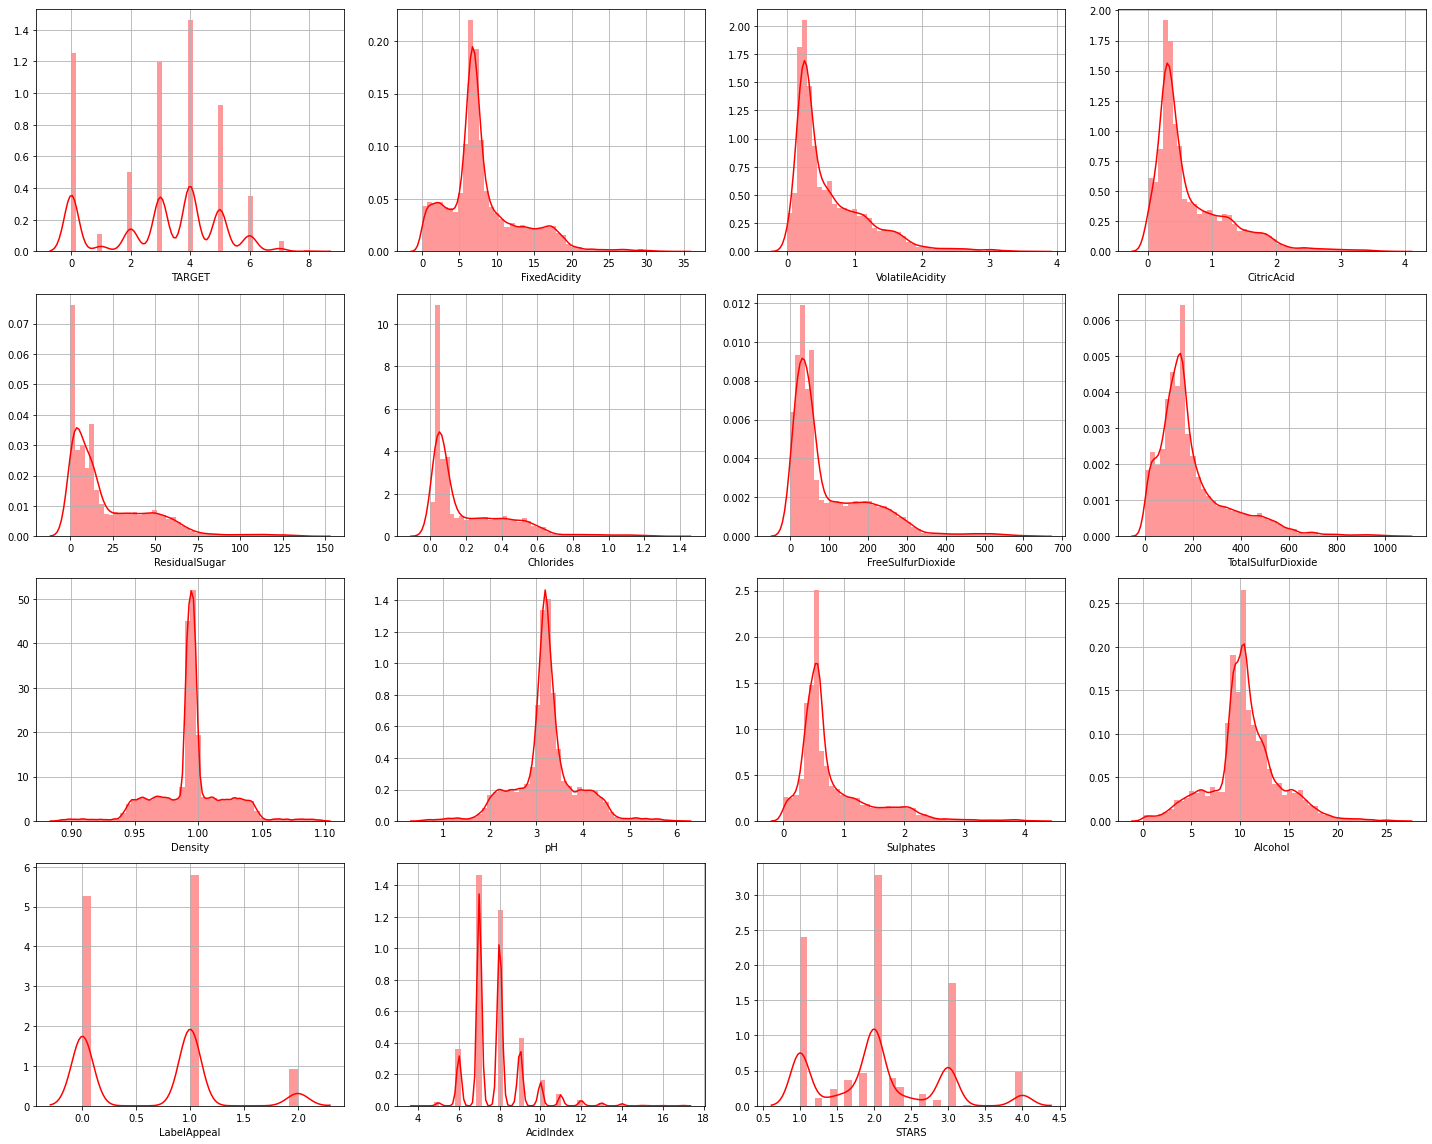

In [ ]:
#distribution histogram of all variables
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(wine.columns.values)):
    plt.subplot(4, 4, i + 1)
    sns.distplot(wine[col], color = 'r', kde = True)
    plt.grid()
    plt.tight_layout()

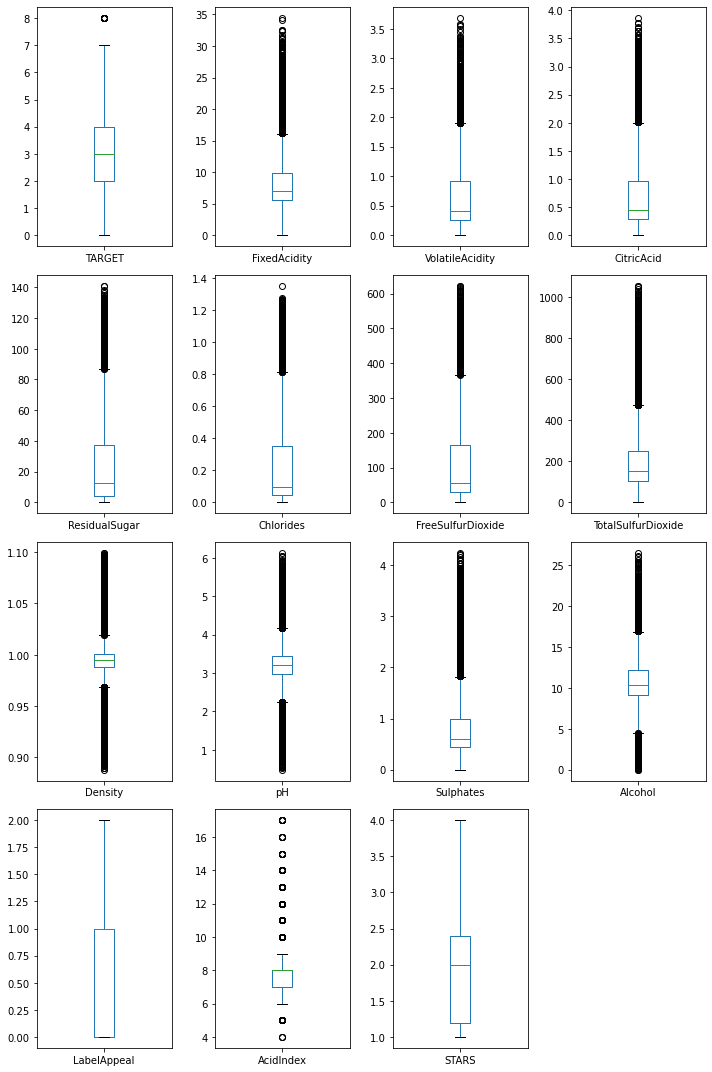

In [ ]:
#boxplot of all variables
plt.figure(figsize = (10, 15))
for i, col in enumerate(list(wine.columns.values)):
    plt.subplot(4, 4, i + 1)
    wine.boxplot(col)
    plt.grid()
    plt.tight_layout()

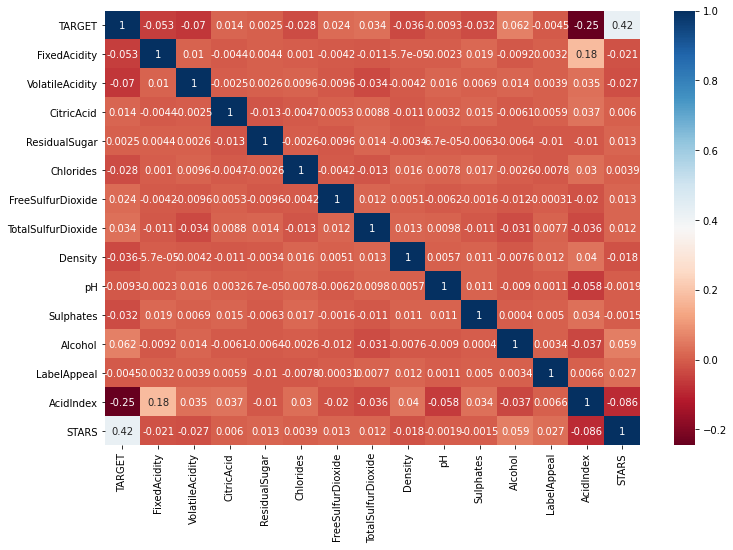

In [ ]:
#correlation heatmap 
plt.figure(figsize=(12,8))
ax = sns.heatmap(wine.corr(), cmap='RdBu', annot=True)
plt.show()

Now we can find that: 
- For the output of describe, all the values are positive. Base on our domain knowledge, this makes sense.
- For the histogram, density, PH, and alcohol are in a normal distribution. Other continuous numerical features are right-skewed.
- For the boxplot, outliers become more concentrated cause we use absolute to deal with the negative value. 
- For the heatmap, TARGET and STARS still have a strong positive correlation. Also, there is some weak correlation between AcidIndex and Fixed Acidity, AcidIndex and TARGET. In general, there is no evidence that there are some obvious correlations among these data.

We also have a prepared dataset for further modeling.

Through previous data, we found KNN is good enough for treating missing value. this time, we use knn to treat all missing values for evaluation data set.

In [ ]:
#clear data
eval= eval_data.copy().drop(columns = ['IN'])

In [ ]:
#see how it look like
eval.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,0.0,3335.000000,3335.000000,3335.000000,3167.000000,3197.000000,3183.000000,3178.000000,3335.000000,3231.000000,3025.000000,3150.000000,3335.000000,3335.000000,2494.000000
mean,NaN,6.863808,0.310271,0.312429,5.319135,0.061425,34.947063,123.410478,0.994670,3.236518,0.534592,10.583632,0.013493,7.747826,2.040096
std,NaN,6.318431,0.806834,0.870994,34.370614,0.313969,149.633473,225.799833,0.026191,0.675559,0.905347,3.758877,0.888572,1.315420,0.913418
min,NaN,-18.200000,-2.830000,-3.120000,-128.300000,-1.150000,-563.000000,-769.000000,0.889750,0.600000,-3.070000,-4.200000,-2.000000,5.000000,1.000000
25%,NaN,5.200000,0.080000,0.000000,-2.600000,0.016000,3.000000,27.250000,0.988305,2.980000,0.330000,9.000000,-1.000000,7.000000,1.000000
50%,NaN,6.900000,0.280000,0.310000,3.600000,0.047000,30.000000,124.000000,0.994600,3.210000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,NaN,9.000000,0.630000,0.605000,17.200000,0.171000,79.250000,210.000000,1.000525,3.490000,0.820000,12.500000,1.000000,8.000000,3.000000
max,NaN,33.500000,3.610000,3.760000,145.400000,1.263000,617.000000,1004.000000,1.099830,6.210000,4.180000,25.600000,2.000000,17.000000,4.000000


In [ ]:
eval = eval.abs()

In [ ]:
#check amount of missing value
eval.isnull().sum()

TARGET                3335
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          168
Chlorides              138
FreeSulfurDioxide      152
TotalSulfurDioxide     157
Density                  0
pH                     104
Sulphates              310
Alcohol                185
LabelAppeal              0
AcidIndex                0
STARS                  841
dtype: int64

## Regression Modeling 

*First of all, we will use two methods to identify explanatory variables: __backward selection__ and __VIF__.*

__Feature Selection 1 --- backward selection__

In [ ]:
# drop the response column
ddd =wine.copy()
ddd.drop(columns=['TARGET'],inplace=True)

In [ ]:
#check the columns
ddd.columns

Index(['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
       'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH',
       'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex', 'STARS'],
      dtype='object')

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
#gather features
features = "+".join(ddd)
# get y and X dataframes based on this regression:
y, X = dmatrices('TARGET ~' + features, df, return_type='dataframe')

#model = LinearRegression()
#print((cross_val_score(model, X, y, cv=10, scoring=make_scorer(mean_squared_error))).mean())

In [ ]:
#define the backward_elimination

#copy the dataset and set the target
data=wine.copy()
target=y

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    result =(np.inf, None)
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)          
            model = LinearRegression()
            X = data[features].values
            score = (cross_val_score(model, X, y, cv=10, scoring=make_scorer(mean_squared_error))).mean()            
            if (score < result[0]):
                result = (score, features)
        else:
            break 
    return result

In [ ]:
#check
backward_elimination(X,y)

(1.3346444208385342,
 ['Intercept',
  'VolatileAcidity',
  'Chlorides',
  'FreeSulfurDioxide',
  'Density',
  'Alcohol',
  'LabelAppeal',
  'AcidIndex',
  'STARS'])

Here is the result of backward selection. We got these features: 'VolatileAcidity', 'Chlorides', 'FreeSulfurDioxide', 'Density', 'Alcohol', 'LabelAppeal', 'AcidIndex','STARS'.

Our formula 1 is as follow:

In [ ]:
formula1 = "TARGET ~ 'VolatileAcidity+ Chlorides+ FreeSulfurDioxide+ Density+ Alcohol+ C(LabelAppeal) + C(AcidIndex) + C(STARS)"

__Feature Selection 2: VIF__

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.%s" % i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.%s" % i)
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [ ]:
# clean inf and nan
wine[np.isnan(wine)] = 0
wine[np.isinf(wine)] = 0

train_out = calculate_vif(wine)
train_out.head() 

Iteration no.1
[4.473629502526509, 3.7259115553918423, 2.3453551175803558, 2.2865448956676118, 1.8754893511309791, 1.889669562650384, 1.9680230921194408, 2.6178985628291667, 89.1804536092436, 23.7036994816742, 2.7201179312300763, 9.8564132964914, 2.0592189840868222, 38.59067653338606, 8.888765926475209]
Max VIF is for variable no.1
8
Iteration no.2
[4.283752692524822, 3.7151996046089306, 2.3210441313037893, 2.272407369488762, 1.8567598821711455, 1.8775267062860432, 1.9431248658549416, 2.5579892378174507, 17.19838702802663, 2.687654096853436, 8.93504265106619, 2.040879176687496, 21.372881405566485, 8.634384911470132]
Max VIF is for variable no.2
12
Iteration no.3
[4.235239447878459, 3.4102747783013845, 2.2857957987739472, 2.230732063577703, 1.8445036716548957, 1.856698052939966, 1.92898552551096, 2.53015931095992, 13.27484467539152, 2.639526008297524, 8.283108548021719, 2.0232166390402053, 8.318913931218649]
Max VIF is for variable no.3
8
Iteration no.4
[4.212292892167153, 3.24965552545

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Sulphates,LabelAppeal
0,3.0,3.2,1.160,0.98,54.2,0.567,56.0,268.0,0.59,0.0
1,3.0,4.5,0.160,0.81,26.1,0.425,15.0,327.0,0.70,1.0
2,5.0,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.48,1.0
3,3.0,5.7,0.385,0.04,18.8,0.425,22.0,115.0,1.83,1.0
4,4.0,8.0,0.330,1.26,9.4,0.098,167.0,108.0,1.77,0.0


Here is the result of VIF. we got these features: 'PH', 'Sulphates',  'LabelAppeal', 'AcidIndex'.

Our formula 2 is as follow:

In [ ]:
formula2 = "TARGET ~ PH+ Sulphates+ LabelAppeal+ AcidIndex"

Then, in this part, we are going to __construct models__:
- two different Poisson regression models,
- two different negative binomial regression models, 
- two multiple linear regression models.

We will use different explanatory variables (or the same variables if they have been transformed via different transformation methods).

Based on the previous analysis of features, we decided to choose suitable variables through GLM to compare performance between poisson and negative binomial regression model, along with comparison with linear regression. We choose the variable based on correlation more than 0.05. 

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm

#use feature selection 1
formula1 = "TARGET ~ VolatileAcidity+ Chlorides+ FreeSulfurDioxide+ Density+ Alcohol+ LabelAppeal + AcidIndex + STARS"


In [ ]:
# Poisson regression model-1
response, predictors = dmatrices(formula1, wine, return_type ='dataframe')
p1 = sm.GLM(response,predictors,family=sm.families.Poisson()).fit()

In [ ]:
# negative binomial regression model-1
response, predictors = dmatrices(formula1, wine, return_type ='dataframe')
n1 = sm.GLM(response, predictors, family=sm.families.NegativeBinomial()).fit()

In [ ]:
# linear regression models-1
import statsmodels.formula.api as smf
lm1 = smf.ols(formula1, data=wine).fit()

In [ ]:
#use feature selection 2

formula2 = "TARGET ~ pH+ Sulphates+ LabelAppeal+ AcidIndex"

In [ ]:
# Poisson regression model-2
response, predictors = dmatrices(formula2, wine, return_type ='dataframe')
p2 = sm.GLM(response,predictors,family=sm.families.Poisson()).fit()

In [ ]:
# negative binomial regression model-2
response, predictors = dmatrices(formula2, wine, return_type ='dataframe')
n2 = sm.GLM(response, predictors, family=sm.families.NegativeBinomial()).fit()

In [ ]:
# linear regression models-2

import statsmodels.formula.api as smf
lm2 = smf.ols(formula2, data=wine).fit()

## Select Models 

Now we can print the summary of each models.


In [ ]:
# Poisson regression model-1
print(p1.summary())

# negative binomial regression model-1
print(n1.summary())

# linear regression models-1
print(lm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12786
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25649.
Date:                Mon, 29 Jun 2020   Deviance:                       19356.
Time:                        04:14:48   Pearson chi2:                 1.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8069      0.19

In [ ]:
# Poisson regression model-2
print(p2.summary())

# negative binomial regression model-2
print(n2.summary())

# linear regression models-2
print(lm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12790
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26874.
Date:                Mon, 29 Jun 2020   Deviance:                       21806.
Time:                        04:14:48   Pearson chi2:                 1.55e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2417      0.043     51.881      

We will use Log Likelihood to compare these models. Log likelihood is a measure of how well a model fits the underlying data. Models with higher Log Likelihood scores are preferable to those having relatively lower scores.

Now we can compare the six models with the Log-Likelihood:
- Poisson regression model-1: -25649.
- negative binomial regression model-1: -28444.
- linear regression models-1: -24901.

- Poisson regression model-2: -26874.
- negative binomial regression model-2: -28737.
- linear regression models-2: -26137.

Then we can find that the __linear regression model 1__ has the highest log-likelihood. 

We can also try to show the result of k-cross validation.

In [ ]:
# K-cross

import statsmodels
from statsmodels.genmod.families import Poisson
from statsmodels.genmod.families import NegativeBinomial

X1 = wine[['VolatileAcidity','Chlorides', 'FreeSulfurDioxide','Density','Alcohol','LabelAppeal','AcidIndex','STARS']] 
X2 = wine[['pH', 'Sulphates', 'LabelAppeal', 'AcidIndex']]
y = wine['TARGET']

model1 = Poisson()
model2 = NegativeBinomial()
model3 = LinearRegression()

from sklearn.model_selection import cross_val_score

#Poisson regression models
#scores = cross_val_score(model1, X1, y, cv=10)
#scores = cross_val_score(model1, X2, y, cv=10)
#NegativeBinomial regression models
#scores = cross_val_score(model2, X1, y, cv=10)
#scores = cross_val_score(model2, X2, y, cv=10)

#linear regression models 
scores1 = cross_val_score(model3, X1, y, cv=10)
scores2 = cross_val_score(model3, X2, y, cv=10)

print(np.mean(scores1))
print(np.mean(scores2))

0.22438380145344694
0.05928523329277816



As we can see that the cross validation shows the linear regression model 1 has a cross validated accuracy of 0.22438380145344694. It's higher than linear regression model 2. Then we can get the conclusion that the __linear regression model 1__ as our 'best' regression model.

Then we will try to apply our 'best' model(linear regression model 1) to the evaluation data set.

In [ ]:
# build function
#predic_y = 4.8173-0.1809*eval['VolatileAcidity']-0.1868*eval['Chlorides']+0.0003*eval['FreeSulfurDioxide']-1.4138*['Density']+0.0170*eval['Alcohol']-0.0424*eval['LabelAppeal']-0.3009*eval['AcidIndex'] +0.9579*eval['STARS']


In [ ]:
# clean inf and nan
eval[np.isnan(eval)] = 0
eval[np.isinf(eval)] = 0

In [ ]:
X = wine[['VolatileAcidity','Chlorides', 'FreeSulfurDioxide','Density','Alcohol','LabelAppeal','AcidIndex','STARS']]
y = wine['TARGET'].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X
y_train = y
X_test = eval[['VolatileAcidity','Chlorides', 'FreeSulfurDioxide','Density','Alcohol','LabelAppeal','AcidIndex','STARS']]
#y = eval['TARGET'].values


regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df


y_pred = regressor.predict(X_test)

TARGET_pred = pd.DataFrame({'Predicted': y_pred})
TARGET_pred.head()

,Predicted
0,1.618451
1,3.520416
2,1.707296
3,2.112017
4,0.408223


In [ ]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              3335 non-null   float64
 1   FixedAcidity        3335 non-null   float64
 2   VolatileAcidity     3335 non-null   float64
 3   CitricAcid          3335 non-null   float64
 4   ResidualSugar       3335 non-null   float64
 5   Chlorides           3335 non-null   float64
 6   FreeSulfurDioxide   3335 non-null   float64
 7   TotalSulfurDioxide  3335 non-null   float64
 8   Density             3335 non-null   float64
 9   pH                  3335 non-null   float64
 10  Sulphates           3335 non-null   float64
 11  Alcohol             3335 non-null   float64
 12  LabelAppeal         3335 non-null   float64
 13  AcidIndex           3335 non-null   float64
 14  STARS               3335 non-null   float64
dtypes: float64(15)
memory usage: 390.9 KB


In [ ]:
TARGET_pred.describe()

,Predicted
count,3335.000000
mean,2.553033
std,1.274021
min,-1.463179
25%,1.492410
50%,2.502387
75%,3.439712
max,5.967727


In [ ]:
#Compare with train data value
df["TARGET"].describe()

count    12795.000000
mean         3.029074
std          1.926368
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: TARGET, dtype: float64

Based on the law of large numbers, both our predict target should have a similar distribution with our original data set. We can tell that they are very similar.

## Conclusions

After all the above, we can find that the linear regression model 1 is the “best” regression model from those we have constructed. This model has the highest log-likelihood value. We also apply this preferred model to the evaluation data set and find it performs well on that previously unseen data. 

# References:
https://www.listendata.com/2018/01/linear-regression-in-python.html
